In [136]:
import keras
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from VNP.packages.nns import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [93]:
df = pd.read_csv("./data/pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [94]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Temperature,0,0.0,5000
1,Humidity,0,0.0,5000
2,PM2.5,0,0.0,5000
3,PM10,0,0.0,5000
4,NO2,0,0.0,5000
5,SO2,0,0.0,5000
6,CO,0,0.0,5000
7,Proximity_to_Industrial_Areas,0,0.0,5000
8,Population_Density,0,0.0,5000
9,Air Quality,0,0.0,5000


In [95]:
target_column = "Air Quality"

,Class,Count,Percentage,Total
0,Good,2000,40.0,5000
1,Hazardous,500,10.0,5000
2,Moderate,1500,30.0,5000
3,Poor,1000,20.0,5000


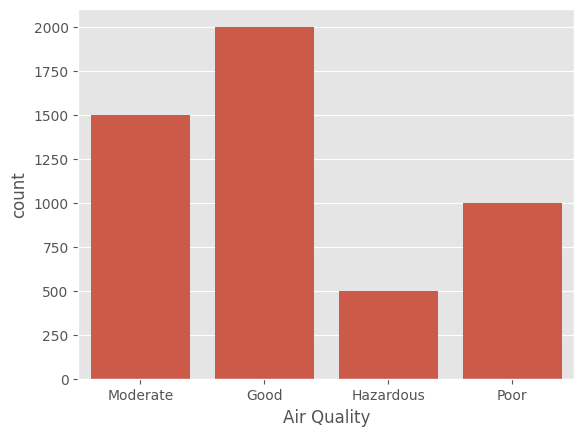

In [96]:
balance_table(df, target_column=target_column, show_visualization=True)

In [97]:
from keras.api.utils import to_categorical

In [100]:
encoder = LabelEncoder()
df_copy = df.copy()
df_copy["Air Quality"] = encoder.fit_transform(df["Air Quality"])

In [101]:
df_copy["Air Quality"]

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int64

In [102]:
X,Y = get_x_and_y(df_copy, target_column)

In [117]:
X

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241


In [118]:
Y

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int64

In [119]:
Y_cat = to_categorical(Y)

In [120]:
Y_cat

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [121]:
x_train,x_test,y_train,y_test = train_test_split(X, Y_cat, test_size=0.2, shuffle=True, random_state=42)

In [122]:
x_train_scaled,x_test_scaled,scaler = scale_data(x_train, x_test, strategy="minmax")

### NN-1

In [127]:
nn_model1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(Y_cat.shape[1], activation='softmax')
])

In [128]:
nn_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [129]:
nn_model1.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,796 (38.27 KB)

 Trainable params: 9,796 (38.27 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
history = nn_model1.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4790 - loss: 1.2253 - val_accuracy: 0.7575 - val_loss: 0.6474
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7829 - loss: 0.6046 - val_accuracy: 0.8350 - val_loss: 0.4128
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.4095 - val_accuracy: 0.8700 - val_loss: 0.3442
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3525 - val_accuracy: 0.8750 - val_loss: 0.3176
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.3067 - val_accuracy: 0.9000 - val_loss: 0.2581
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss: 0.2803 - val_accuracy: 0.9075 - val_loss: 0.2418
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9069 - loss: 0.2636 - val_accuracy: 0.9137 - val_loss: 0.2218
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - loss: 0.2662 - val_accuracy: 0.

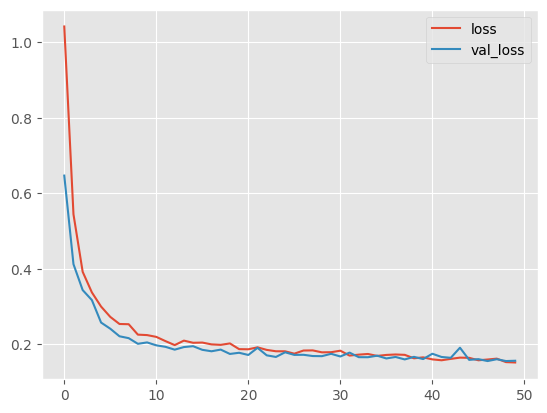

In [144]:
train_history_visualization(history)

In [131]:
predicts_1 = nn_model1.predict(x_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.93      0.79      0.85       111
           2       0.96      0.97      0.97       294
           3       0.84      0.90      0.87       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



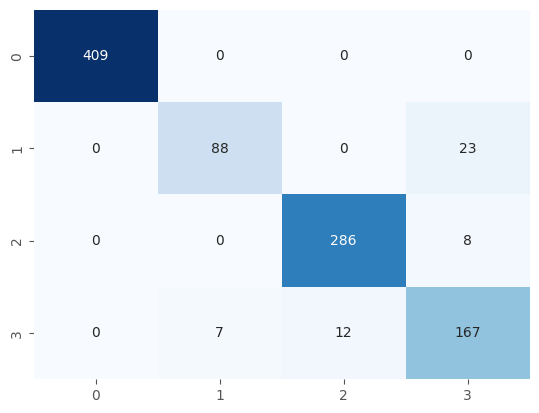

In [137]:
classification_report_ez(y_test,predicts_1,show_visualization=True,multiclass=True)

### NN-2

In [138]:
nn_model_2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(units=32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(Y_cat.shape[1], kernel_initializer="uniform", activation="softmax")
])

nn_model_2.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
)
nn_model_2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,972 (7.70 KB)

 Trainable params: 1,972 (7.70 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
history_2 = nn_model_2.fit(x_train_scaled, y_train, batch_size=16, epochs=20, validation_split=0.1)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1668 - precision_12: 0.9344 - recall_12: 0.9344 - val_loss: 0.1646 - val_precision_12: 0.9275 - val_recall_12: 0.9275
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1971 - precision_12: 0.9171 - recall_12: 0.9171 - val_loss: 0.1572 - val_precision_12: 0.9400 - val_recall_12: 0.9400
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1715 - precision_12: 0.9399 - recall_12: 0.9399 - val_loss: 0.1687 - val_precision_12: 0.9350 - val_recall_12: 0.9350
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1768 - precision_12: 0.9247 - recall_12: 0.9245 - val_loss: 0.1658 - val_precision_12: 0.9400 - val_recall_12: 0.9400
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1676 - precision_12: 0.9391 - recall_12: 0.9391 - val_loss: 0.1719 - val_precision_12: 0.9225 - val_recall_12: 0.9225
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1839 - precision_12: 0.9309 - recall_1

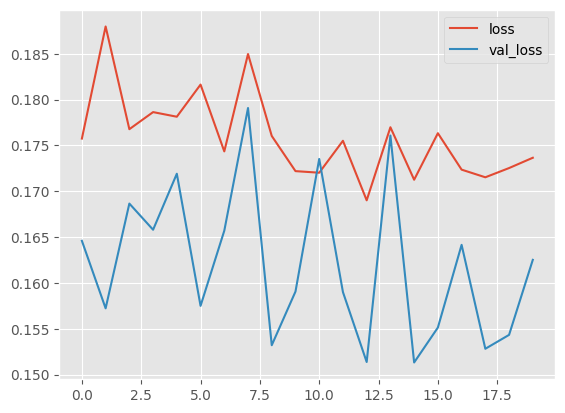

In [141]:
train_history_visualization(history_2)

In [142]:
predicts_2 = nn_model_2.predict(x_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.73      0.83       111
           2       0.95      0.94      0.95       294
           3       0.78      0.91      0.84       186

    accuracy                           0.94      1000
   macro avg       0.92      0.90      0.90      1000
weighted avg       0.94      0.94      0.94      1000



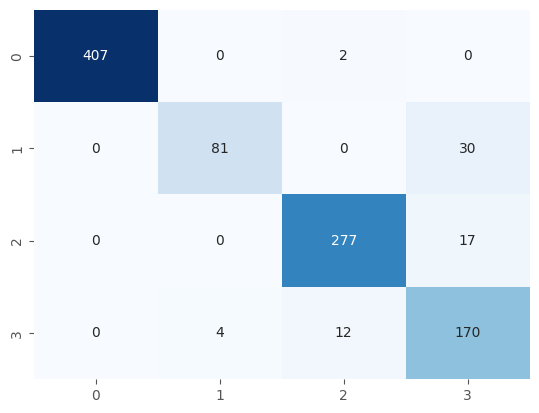

In [143]:
classification_report_ez(y_test, predicts_2, show_visualization=True, multiclass=True)

### NN-3

In [146]:
nn_model_3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(Y_cat.shape[1], activation='softmax')
])

nn_model_3.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
)
nn_model_3.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,748 (45.89 KB)

 Trainable params: 11,748 (45.89 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
history_3 = nn_model_3.fit(x_train_scaled, y_train, batch_size=16, epochs=20, validation_split=0.1)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0490 - precision_13: 0.7275 - recall_13: 0.2270 - val_loss: 0.3539 - val_precision_13: 0.9045 - val_recall_13: 0.8525
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3563 - precision_13: 0.8736 - recall_13: 0.8451 - val_loss: 0.2867 - val_precision_13: 0.8813 - val_recall_13: 0.8725
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3006 - precision_13: 0.8882 - recall_13: 0.8818 - val_loss: 0.2312 - val_precision_13: 0.9225 - val_recall_13: 0.9225
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2476 - precision_13: 0.9059 - recall_13: 0.9053 - val_loss: 0.2395 - val_precision_13: 0.9075 - val_recall_13: 0.9075
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2407 - precision_13: 0.9043 - recall_13: 0.9036 - val_loss: 0.2223 - val_precision_13: 0.9225 - val_recall_13: 0.9225
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2105 - precision_13: 0.9244 - recall_1

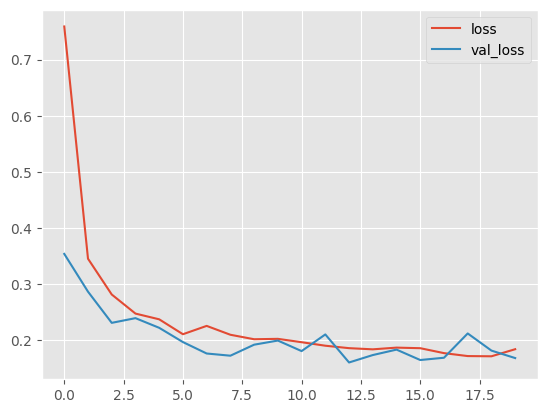

In [148]:
train_history_visualization(history_3)

In [149]:
predicts_3 = nn_model_3.predict(x_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.89      0.82      0.85       111
           2       0.95      0.98      0.97       294
           3       0.86      0.87      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



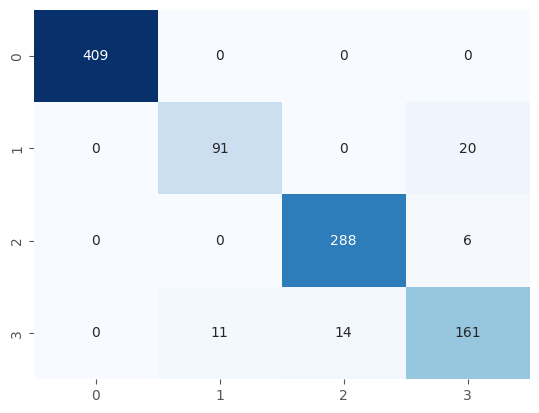

In [150]:
classification_report_ez(y_test, predicts_3, show_visualization=True, multiclass=True)